In [36]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [37]:
img_height, img_width = 128, 128  
test_dir = "mydata/test"       

class_names = sorted(os.listdir(test_dir))
print("Class names:", class_names)

Class names: ['complex', 'frog_eye_leaf_spot', 'healthy', 'multiple_diseases', 'powdery_mildew', 'rust', 'scab', 'scab frog_eye_leaf_spot']


In [38]:
model = load_model("my_model.h5")

In [39]:
def load_images_and_labels(test_dir, class_names, img_height, img_width):
    images = []
    labels = []
    image_paths = []

    for class_name in class_names:
        class_path = os.path.join(test_dir, class_name)
        if not os.path.isdir(class_path):
            continue

        for img_name in os.listdir(class_path):
            if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(class_path, img_name)
                img = load_img(img_path, target_size=(img_height, img_width))
                img_array = img_to_array(img) / 255.0  # Normalizacija

                images.append(img_array)
                labels.append(class_name)
                image_paths.append(img_path)

    return np.array(images), labels, image_paths


# Učitaj slike i pripadajuće klase
images, labels, image_paths = load_images_and_labels(test_dir, class_names, img_height, img_width)



In [40]:
predictions = model.predict(images)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/stepWARNING:tensorflow:6 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7b85a87c6c20> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step


In [41]:
len(images)

40

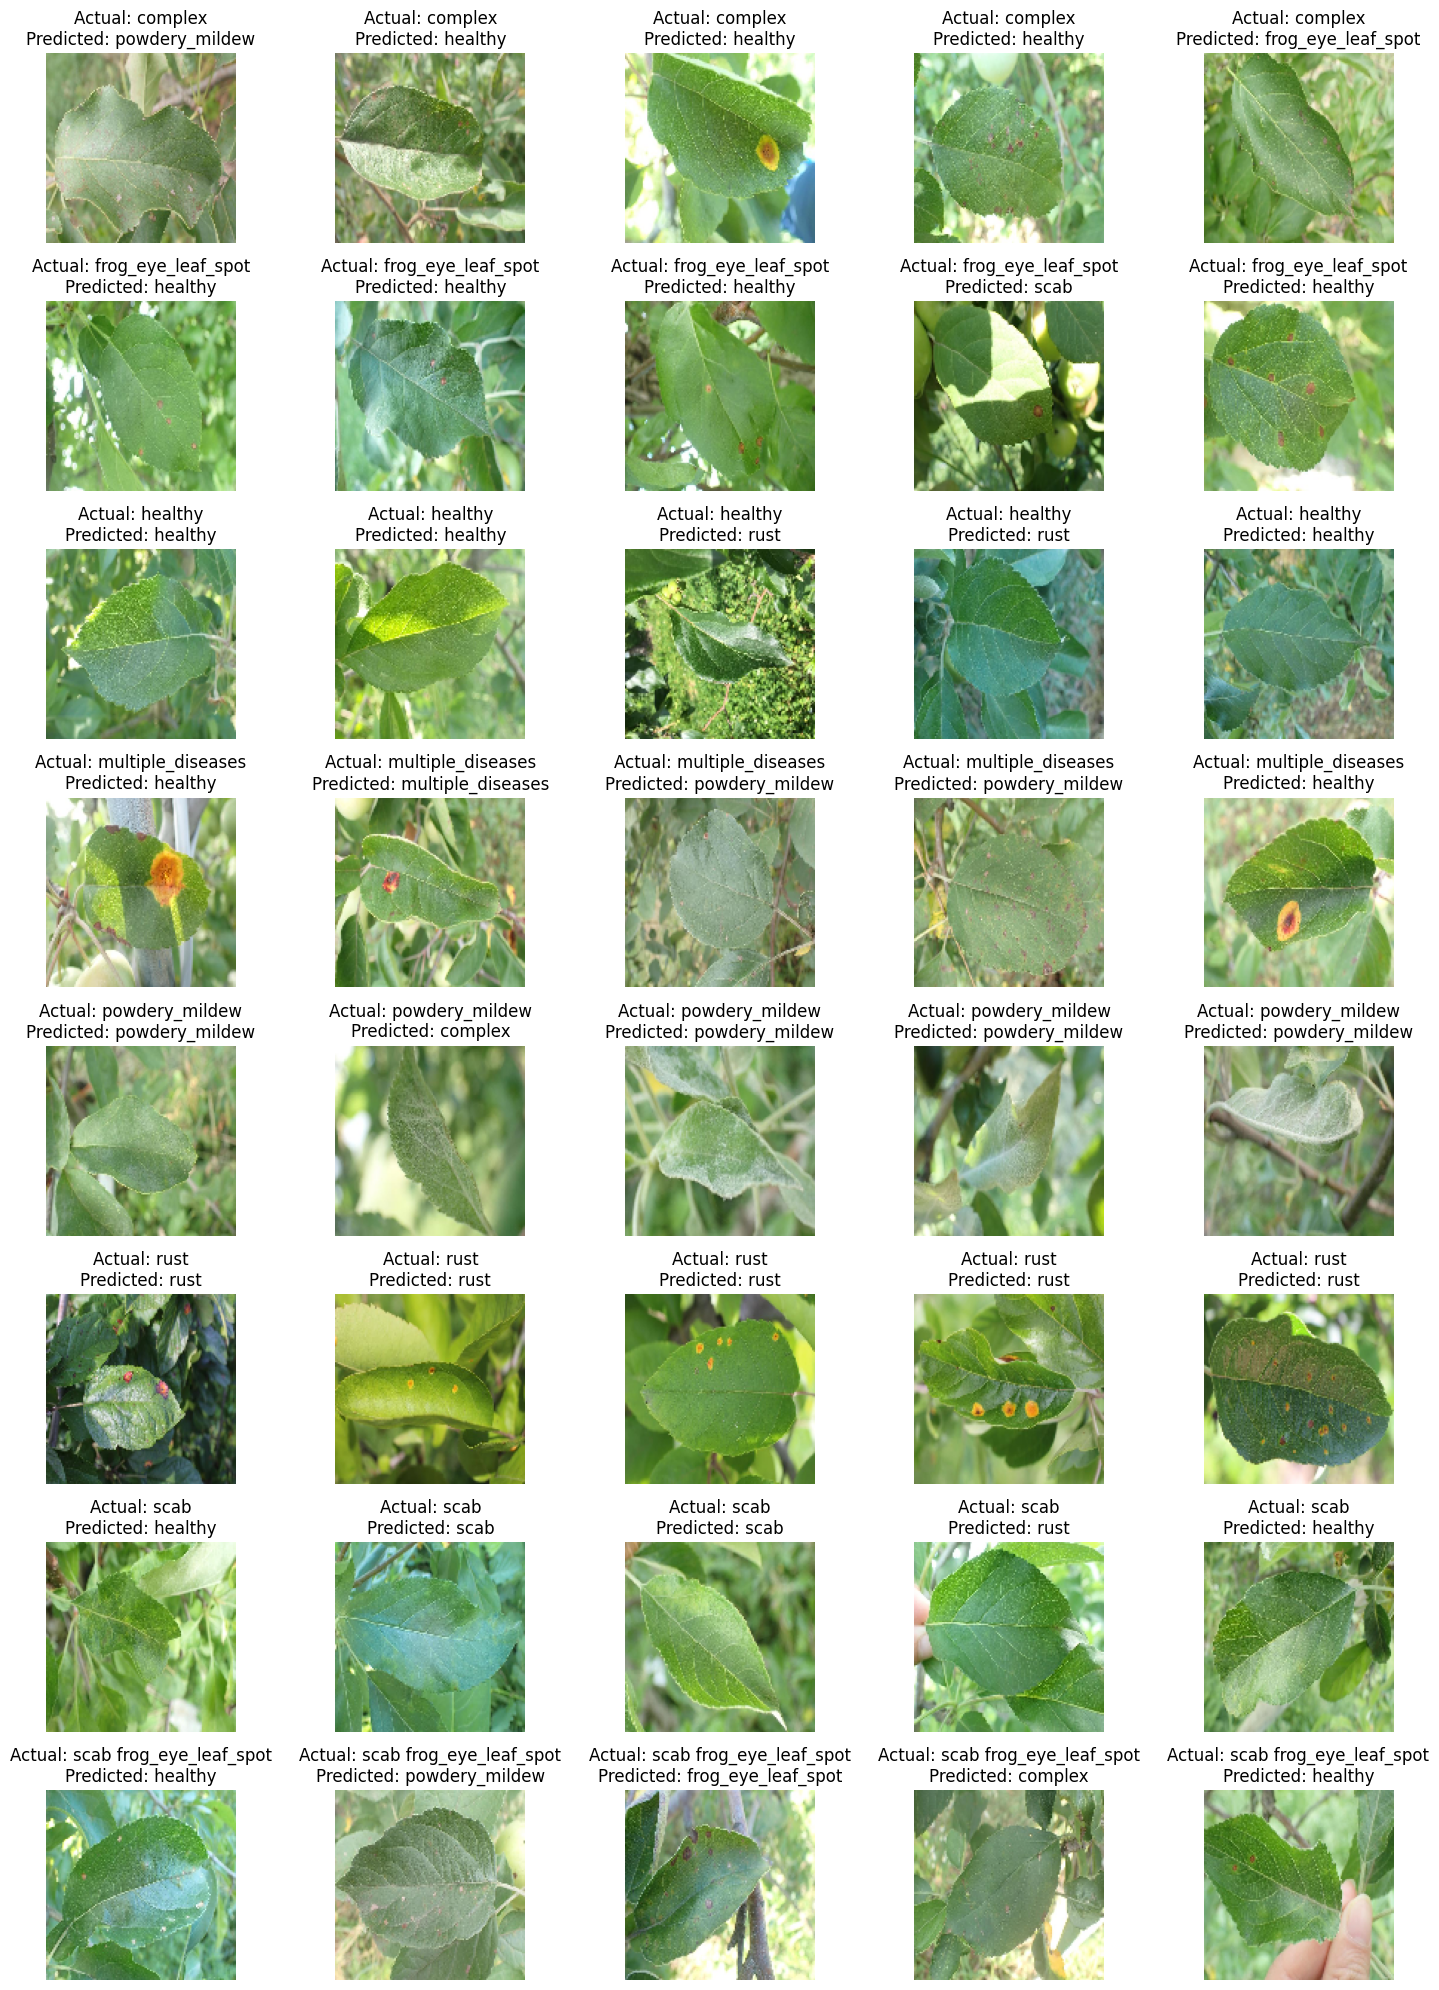

In [42]:

plt.figure(figsize=(15, 20))

for i in range(len(images)):
    predicted_class_index = np.argmax(predictions[i])
    predicted_class_name = class_names[predicted_class_index]

    plt.subplot(8, 5, i + 1)
    plt.imshow(load_img(image_paths[i], target_size=(img_height, img_width)))
    plt.title(f"Actual: {labels[i]}\nPredicted: {predicted_class_name}")
    plt.axis("off")

plt.subplots_adjust(wspace=0.1, hspace=0.1) 
plt.tight_layout()
plt.show()
